# 🎧 Análisis de iTunes - Paso 1: Preparación de los Datos
Este notebook realiza la carga y limpieza inicial de los datos de scraping de iTunes Store en EE. UU. entre el 20 y el 27 de abril de 2025.

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

def cargar_datos_itunes(directorio="../data/data_raw", patron="itunes_2025-04-*.csv"):
    """
    Carga y concatena archivos CSV de iTunes desde un directorio dado que cumplan con un patrón.

    Parámetros:
    - directorio (str): Ruta al directorio donde se encuentran los archivos CSV.
    - patron (str): Patrón de búsqueda de archivos CSV.

    Retorna:
    - DataFrame concatenado con todos los registros encontrados.
    """
    ruta = Path(directorio)
    archivos_csv = sorted(ruta.glob(patron))
    if not archivos_csv:
        print("No se encontraron archivos que coincidan con el patrón.")
        return pd.DataFrame()  # Devuelve un DataFrame vacío si no encuentra archivos
    
    df = pd.concat([pd.read_csv(f) for f in archivos_csv], ignore_index=True)
    print(f"Total de registros cargados: {df.shape[0]}")
    return df

In [2]:
df = cargar_datos_itunes()
df.head()

Total de registros cargados: 118808


,wrapperType,kind,artistId,collectionId,trackId,artistName,collectionName,trackName,collectionCensoredName,trackCensoredName,artistViewUrl,collectionViewUrl,trackViewUrl,previewUrl,artworkUrl30,artworkUrl60,artworkUrl100,collectionPrice,trackPrice,releaseDate,collectionExplicitness,trackExplicitness,discCount,discNumber,trackCount,trackNumber,trackTimeMillis,country,currency,primaryGenreName,isStreamable,collectionArtistId,collectionArtistName,collectionArtistViewUrl,contentAdvisoryRating,checked_at
0,track,song,14406835,40459605.0,40459637,The Blues Brothers,Briefcase Full of Blues,Soul Man,Briefcase Full of Blues,Soul Man,https://music.apple.com/us/artist/the-blues-br...,https://music.apple.com/us/album/soul-man/4045...,https://music.apple.com/us/album/soul-man/4045...,https://audio-ssl.itunes.apple.com/itunes-asse...,https://is1-ssl.mzstatic.com/image/thumb/Music...,https://is1-ssl.mzstatic.com/image/thumb/Music...,https://is1-ssl.mzstatic.com/image/thumb/Music...,9.99,1.29,1978-11-01T12:00:00Z,notExplicit,notExplicit,1.0,1.0,12.0,9.0,208498.0,USA,USD,Blues,True,NaN,NaN,NaN,NaN,2025-04-20T18:22:04.844991+00:00
1,track,song,14406835,452584443.0,452584459,The Blues Brothers,The Blues Brothers (Original Soundtrack Record...,Everybody Needs Somebody to Love,The Blues Brothers (Original Soundtrack Record...,Everybody Needs Somebody to Love,https://music.apple.com/us/artist/the-blues-br...,https://music.apple.com/us/album/everybody-nee...,https://music.apple.com/us/album/everybody-nee...,https://audio-ssl.itunes.apple.com/itunes-asse...,https://is1-ssl.mzstatic.com/image/thumb/Music...,https://is1-ssl.mzstatic.com/image/thumb/Music...,https://is1-ssl.mzstatic.com/image/thumb/Music...,10.99,1.29,1990-01-01T12:00:00Z,notExplicit,notExplicit,1.0,1.0,11.0,5.0,200733.0,USA,USD,Soundtrack,True,NaN,NaN,NaN,NaN,2025-04-20T18:22:04.844991+00:00
2,track,song,14406835,452584443.0,452584447,The Blues Brothers,The Blues Brothers (Original Soundtrack Record...,Peter Gunn Theme,The Blues Brothers (Original Soundtrack Record...,Peter Gunn Theme,https://music.apple.com/us/artist/the-blues-br...,https://music.apple.com/us/album/peter-gunn-th...,https://music.apple.com/us/album/peter-gunn-th...,https://audio-ssl.itunes.apple.com/itunes-asse...,https://is1-ssl.mzstatic.com/image/thumb/Music...,https://is1-ssl.mzstatic.com/image/thumb/Music...,https://is1-ssl.mzstatic.com/image/thumb/Music...,10.99,1.29,1980-06-01T12:00:00Z,notExplicit,notExplicit,1.0,1.0,11.0,2.0,230333.0,USA,USD,Soundtrack,True,NaN,NaN,NaN,NaN,2025-04-20T18:22:04.844991+00:00
3,track,song,14406835,452584443.0,452584465,The Blues Brothers,The Blues Brothers (Original Soundtrack Record...,Theme from Rawhide,The Blues Brothers (Original Soundtrack Record...,Theme from Rawhide,https://music.apple.com/us/artist/the-blues-br...,https://music.apple.com/us/album/theme-from-ra...,https://music.apple.com/us/album/theme-from-ra...,https://audio-ssl.itunes.apple.com/itunes-asse...,https://is1-ssl.mzstatic.com/image/thumb/Music...,https://is1-ssl.mzstatic.com/image/thumb/Music...,https://is1-ssl.mzstatic.com/image/thumb/Music...,10.99,1.29,1980-06-01T12:00:00Z,notExplicit,notExplicit,1.0,1.0,11.0,8.0,159600.0,USA,USD,Soundtrack,True,NaN,NaN,NaN,NaN,2025-04-20T18:22:04.844991+00:00
4,track,song,14406835,40459605.0,40459628,The Blues Brothers,Briefcase Full of Blues,Rubber Biscuit,Briefcase Full of Blues,Rubber Biscuit,https://music.apple.com/us/artist/the-blues-br...,https://music.apple.com/us/album/rubber-biscui...,https://music.apple.com/us/album/rubber-biscui...,https://audio-ssl.itunes.apple.com/itunes-asse...,https://is1-ssl.mzstatic.com/image/thumb/Music...,https://is1-ssl.mzstatic.com/image/thumb/Music...,https://is1-ssl.mzstatic.com/image/thumb/Music...,9.99,1.29,1978-11-01T12:00:00Z,notExplicit,notExplicit,1.0,1.0,12.0,5.0,177800.0,USA,USD,Blues,True,NaN,NaN,NaN,NaN,2025-04-20T18:22:04.844991+00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118808 entries, 0 to 118807
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   wrapperType              118808 non-null  object 
 1   kind                     118808 non-null  object 
 2   artistId                 118808 non-null  int64  
 3   collectionId             118019 non-null  float64
 4   trackId                  118808 non-null  int64  
 5   artistName               118735 non-null  object 
 6   collectionName           118019 non-null  object 
 7   trackName                118808 non-null  object 
 8   collectionCensoredName   118019 non-null  object 
 9   trackCensoredName        118808 non-null  object 
 10  artistViewUrl            118680 non-null  object 
 11  collectionViewUrl        118019 non-null  object 
 12  trackViewUrl             118808 non-null  object 
 13  previewUrl               118740 non-null  object 
 14  artw

## 🧼 Limpieza de Datos
- Normalización de fechas y texto
- Eliminación de duplicados y nulos

In [4]:
import re
import unicodedata

def limpieza_total_texto_final(df):
    """
    Limpia exhaustivamente todas las columnas de tipo texto (object) en un DataFrame para depurar datos contaminados
    provenientes de fuentes como APIs. Esta limpieza está especialmente diseñada para contenido musical (iTunes, etc.).

    ✔️ Operaciones que realiza:
    ---------------------------
    - Elimina cadenas con errores comunes como:
        '#¿NOMBRE?', '#¡VALOR!', '¿?', etc. que podrían provenir de errores de importación o codificación.
    - Detecta y elimina:
        • Números puros (como '123', '3235', '111.0') aunque estén en formato string (object)
        • Números rodeados de puntos o espacios (ej: '... 3235 ...')
        • Fechas mal formateadas del tipo '09-may', '10-abr', etc.
        • Entradas vacías, signos aislados o cadenas con solo símbolos (ej: '?', '!', '---')
    - Aplica normalización Unicode:
        Elimina acentos y convierte caracteres a ASCII usando `unicodedata`.
    - Limpia espacios extra y caracteres no deseados con expresiones regulares.
    - Elimina filas donde todas las columnas de texto hayan quedado vacías tras la limpieza.

    ❗ NOTA:
    -------
    - Esta función **no convierte a minúsculas**: respeta las mayúsculas originales.
    - Todos los filtros se aplican aún si los datos están en formato `object` (string no tipado).

    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame que contiene columnas de texto potencialmente contaminadas.

    Retorna:
    --------
    pandas.DataFrame
        Un DataFrame limpio, con columnas texto depuradas y sin filas inútiles.
    """

    def limpiar_valor(val):
        if pd.isna(val):
            return ""

        val = str(val).strip()

        if any(pat in val.lower() for pat in ["¿", "¡", "nombre", "valor"]):
            return ""

        if re.fullmatch(r"\.*\s*\d+(\.\d+)?\s*\.*", val):
            return ""

        if re.fullmatch(r"\d{1,2}-[a-zA-Z]{3}", val):
            return ""

        if re.fullmatch(r"[^\w]*", val):
            return ""

        val = unicodedata.normalize("NFKD", val).encode("ascii", "ignore").decode("utf-8")
        val = re.sub(r"[^\w\s.,'&!?-]", "", val)
        val = re.sub(r"\s+", " ", val).strip()

        if len(val) < 2:
            return ""

        return val

    columnas_objetivas = df.select_dtypes(include=["object"]).columns
    for col in columnas_objetivas:
        df[col] = df[col].apply(limpiar_valor)

    mask = df[columnas_objetivas].apply(lambda row: all(val == "" for val in row), axis=1)
    df = df[~mask]

    return df

In [5]:
# Aplicar la función de limpieza a todo el DataFrame
df = limpieza_total_texto_final(df)
df

,wrapperType,kind,artistId,collectionId,trackId,artistName,collectionName,trackName,collectionCensoredName,trackCensoredName,artistViewUrl,collectionViewUrl,trackViewUrl,previewUrl,artworkUrl30,artworkUrl60,artworkUrl100,collectionPrice,trackPrice,releaseDate,collectionExplicitness,trackExplicitness,discCount,discNumber,trackCount,trackNumber,trackTimeMillis,country,currency,primaryGenreName,isStreamable,collectionArtistId,collectionArtistName,collectionArtistViewUrl,contentAdvisoryRating,checked_at
0,track,song,14406835,4.045960e+07,40459637,The Blues Brothers,Briefcase Full of Blues,Soul Man,Briefcase Full of Blues,Soul Man,httpsmusic.apple.comusartistthe-blues-brothers...,httpsmusic.apple.comusalbumsoul-man40459605?i4...,httpsmusic.apple.comusalbumsoul-man40459605?i4...,httpsaudio-ssl.itunes.apple.comitunes-assetsAu...,httpsis1-ssl.mzstatic.comimagethumbMusic125v49...,httpsis1-ssl.mzstatic.comimagethumbMusic125v49...,httpsis1-ssl.mzstatic.comimagethumbMusic125v49...,9.99,1.29,1978-11-01T120000Z,notExplicit,notExplicit,1.0,1.0,12.0,9.0,208498.0,USA,USD,Blues,True,NaN,,,,2025-04-20T182204.8449910000
1,track,song,14406835,4.525844e+08,452584459,The Blues Brothers,The Blues Brothers Original Soundtrack Recording,Everybody Needs Somebody to Love,The Blues Brothers Original Soundtrack Recording,Everybody Needs Somebody to Love,httpsmusic.apple.comusartistthe-blues-brothers...,httpsmusic.apple.comusalbumeverybody-needs-som...,httpsmusic.apple.comusalbumeverybody-needs-som...,httpsaudio-ssl.itunes.apple.comitunes-assetsAu...,httpsis1-ssl.mzstatic.comimagethumbMusic115v4c...,httpsis1-ssl.mzstatic.comimagethumbMusic115v4c...,httpsis1-ssl.mzstatic.comimagethumbMusic115v4c...,10.99,1.29,1990-01-01T120000Z,notExplicit,notExplicit,1.0,1.0,11.0,5.0,200733.0,USA,USD,Soundtrack,True,NaN,,,,2025-04-20T182204.8449910000
2,track,song,14406835,4.525844e+08,452584447,The Blues Brothers,The Blues Brothers Original Soundtrack Recording,Peter Gunn Theme,The Blues Brothers Original Soundtrack Recording,Peter Gunn Theme,httpsmusic.apple.comusartistthe-blues-brothers...,httpsmusic.apple.comusalbumpeter-gunn-theme452...,httpsmusic.apple.comusalbumpeter-gunn-theme452...,httpsaudio-ssl.itunes.apple.comitunes-assetsAu...,httpsis1-ssl.mzstatic.comimagethumbMusic115v4c...,httpsis1-ssl.mzstatic.comimagethumbMusic115v4c...,httpsis1-ssl.mzstatic.comimagethumbMusic115v4c...,10.99,1.29,1980-06-01T120000Z,notExplicit,notExplicit,1.0,1.0,11.0,2.0,230333.0,USA,USD,Soundtrack,True,NaN,,,,2025-04-20T182204.8449910000
3,track,song,14406835,4.525844e+08,452584465,The Blues Brothers,The Blues Brothers Original Soundtrack Recording,Theme from Rawhide,The Blues Brothers Original Soundtrack Recording,Theme from Rawhide,httpsmusic.apple.comusartistthe-blues-brothers...,httpsmusic.apple.comusalbumtheme-from-rawhide4...,httpsmusic.apple.comusalbumtheme-from-rawhide4...,httpsaudio-ssl.itunes.apple.comitunes-assetsAu...,httpsis1-ssl.mzstatic.comimagethumbMusic115v4c...,httpsis1-ssl.mzstatic.comimagethumbMusic115v4c...,httpsis1-ssl.mzstatic.comimagethumbMusic115v4c...,10.99,1.29,1980-06-01T120000Z,notExplicit,notExplicit,1.0,1.0,11.0,8.0,159600.0,USA,USD,Soundtrack,True,NaN,,,,2025-04-20T182204.8449910000
4,track,song,14406835,4.045960e+07,40459628,The Blues Brothers,Briefcase Full of Blues,Rubber Biscuit,Briefcase Full of Blues,Rubber Biscuit,httpsmusic.apple.comusartistthe-blues-brothers...,httpsmusic.apple.comusalbumrubber-biscuit40459...,httpsmusic.apple.comusalbumrubber-biscuit40459...,httpsaudio-ssl.itunes.apple.comitunes-assetsAu...,httpsis1-ssl.mzstatic.comimagethumbMusic125v49...,httpsis1-ssl.mzstatic.comimagethumbMusic125v49...,httpsis1-ssl.mzstatic.comimagethumbMusic125v49...,9.99,1.29,1978-11-01T120000Z,notExplicit,notExplicit,1.0,1.0,12.0,5.0,177800.0,USA,USD,Blues,True,NaN,,,,2025-04-20T182204.8449910000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118803,track,so

In [6]:
# Función para eliminar hora, minutos y segundos usando .str.split() y convertir a datetime
def limpiar_fechas_split(df):
    """
    Elimina la parte de hora, minutos y segundos de las columnas 'checked_at' y 'releaseDate'
    usando string split y reconvierte a datetime64[ns].

    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame que contiene las columnas de fechas.

    Retorna:
    --------
    pandas.DataFrame
        DataFrame con 'checked_at' y 'releaseDate' en formato datetime64[ns], sin horas.
    """
    df["checked_at"] = pd.to_datetime(df["checked_at"].astype(str).str.split("T").str[0], errors="coerce")
    df["releaseDate"] = pd.to_datetime(df["releaseDate"].astype(str).str.split("T").str[0], errors="coerce")
    return df

In [7]:
# Aplicar al DataFrame
df = limpiar_fechas_split(df)
df.sample(3)

,wrapperType,kind,artistId,collectionId,trackId,artistName,collectionName,trackName,collectionCensoredName,trackCensoredName,artistViewUrl,collectionViewUrl,trackViewUrl,previewUrl,artworkUrl30,artworkUrl60,artworkUrl100,collectionPrice,trackPrice,releaseDate,collectionExplicitness,trackExplicitness,discCount,discNumber,trackCount,trackNumber,trackTimeMillis,country,currency,primaryGenreName,isStreamable,collectionArtistId,collectionArtistName,collectionArtistViewUrl,contentAdvisoryRating,checked_at
52707,track,song,1396072448,1.338824e+09,1338823821,"MB, K&K & Fatal Error",Xperience - Single,Xperience,Xperience - Single,Xperience,httpsmusic.apple.comusartistmb1396072448?uo4,httpsmusic.apple.comusalbumxperience1338823724...,httpsmusic.apple.comusalbumxperience1338823724...,httpsaudio-ssl.itunes.apple.comitunes-assetsAu...,httpsis1-ssl.mzstatic.comimagethumbMusic118v45...,httpsis1-ssl.mzstatic.comimagethumbMusic118v45...,httpsis1-ssl.mzstatic.comimagethumbMusic118v45...,1.29,1.29,2018-02-15,notExplicit,notExplicit,1.0,1.0,1.0,1.0,201621.0,USA,USD,Hardcore,True,NaN,,,,2025-04-23
96453,track,song,1527728221,9.217680e+08,921768018,VG,Mi Nina Traviesa,El Tonto,Mi Nina Traviesa,El Tonto,httpsmusic.apple.comusartistvg1527728221?uo4,httpsmusic.apple.comusalbumel-tonto921768007?i...,httpsmusic.apple.comusalbumel-tonto921768007?i...,httpsaudio-ssl.itunes.apple.comitunes-assetsMu...,httpsis1-ssl.mzstatic.comimagethumbMusic4v4a86...,httpsis1-ssl.mzstatic.comimagethumbMusic4v4a86...,httpsis1-ssl.mzstatic.comimagethumbMusic4v4a86...,9.90,0.99,2014-09-06,explicit,notExplicit,1.0,1.0,10.0,6.0,199600.0,USA,USD,R&BSoul,True,NaN,,,,2025-04-25
92622,track,song,1452843014,1.547343e+09,1547343001,ul,Lich Remastered - Single,Lich Remastered,Lich Remastered - Single,Lich Remastered,httpsmusic.apple.comusartist24ul1452843014?uo4,httpsmusic.apple.comusalbumlich-remastered1547...,httpsmusic.apple.comusalbumlich-remastered1547...,httpsaudio-ssl.itunes.apple.comitunes-assetsAu...,httpsis1-ssl.mzstatic.comimagethumbMusic124v4e...,httpsis1-ssl.mzstatic.comimagethumbMusic124v4e...,httpsis1-ssl.mzstatic.comimagethumbMusic124v4e...,0.99,0.99,2018-11-04,explicit,explicit,1.0,1.0,1.0,1.0,62774.0,USA,USD,Hip-HopRap,True,NaN,,,Explicit,2025-04-25


In [8]:
def convertir_columnas_a_entero(df, columnas):
    """
    Convierte columnas numéricas a tipo entero truncando los decimales,
    sin modificar la secuencia de IDs original ni generar nuevos valores.

    Operaciones:
    - Reemplaza comas por puntos (si hay errores de separación decimal)
    - Convierte a numérico (coerción si hay errores)
    - Elimina parte decimal truncando (sin redondeo)
    - Convierte a tipo Int64 para mantener nulos

    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame original.

    columnas : list[str]
        Columnas que deben convertirse a enteros sin parte decimal.

    Retorna:
    --------
    pandas.DataFrame
        El DataFrame con las columnas convertidas a enteros reales.
    """
    for col in columnas:
        df[col] = df[col].astype(str).str.replace(",", ".", regex=False)
        df[col] = pd.to_numeric(df[col], errors="coerce")
        df[col] = df[col].apply(lambda x: int(x) if pd.notna(x) else pd.NA)
        df[col] = df[col].astype("Int64")
    return df

# Aplicar a columnas tipo float
df = convertir_columnas_a_entero(df, ["collectionId", "collectionArtistId", "trackTimeMillis", "discCount",
                                       "discNumber", "trackCount", "trackNumber"])

# Confirmar tipos y primeros valores
df[["collectionId", "collectionArtistId", "trackTimeMillis", "discCount",
                                       "discNumber", "trackCount", "trackNumber"]].dtypes, 
df[["collectionId", "collectionArtistId", "trackTimeMillis", "discCount",
                                       "discNumber", "trackCount", "trackNumber"]].head(10)

,collectionId,collectionArtistId,trackTimeMillis,discCount,discNumber,trackCount,trackNumber
0,40459605,<NA>,208498,1,1,12,9
1,452584443,<NA>,200733,1,1,11,5
2,452584443,<NA>,230333,1,1,11,2
3,452584443,<NA>,159600,1,1,11,8
4,40459605,<NA>,177800,1,1,12,5
5,452584443,<NA>,187693,1,1,11,3
6,452584443,<NA>,201467,1,1,11,11
7,452584443,<NA>,473000,1,1,11,10
8,452584443,<NA>,249400,1,1,11,1
9,40459605,<NA>,181333,1,1,12,2


In [11]:
def convertir_a_booleano(df, columna):
    """
    Convierte una columna del DataFrame a tipo booleano (`True`, `False`, `<NA>`),
    manejando cadenas en mayúsculas/minúsculas y permitiendo valores nulos.

    Esta función también reemplaza valores vacíos o mal formateados como:
    "", " ", "nan", "NaN" por `pd.NA` antes de la conversión.

    Parámetros:
    -----------
    df : pandas.DataFrame
        El DataFrame a procesar.

    columna : str
        Nombre de la columna que se desea convertir a tipo booleano.

    Retorna:
    --------
    pandas.DataFrame
        El DataFrame con la columna convertida a tipo booleano y valores no válidos tratados como nulos.
    """
    # Reemplazar valores no informativos por pd.NA (vacíos o mal escritos)
    df.replace(["", " ", "nan", "NaN"], pd.NA, inplace=True)

    # Convertir columna a booleano interpretando correctamente "true"/"false"
    df.loc[:, columna] = df[columna].map(
        lambda x: True if str(x).strip().lower() == "true"
        else False if str(x).strip().lower() == "false"
        else pd.NA
    )

    # Forzar tipo boolean con soporte para nulos
    df[columna] = df[columna].astype("boolean")
    return df

# Aplicar la función a la columna isStreamable
df = convertir_a_booleano(df, "isStreamable")

# Confirmar resultado
df["isStreamable"].dtypes, df["isStreamable"].value_counts(dropna=False)

(BooleanDtype,
 isStreamable
 True     114866
 False      2853
 <NA>       1089
 Name: count, dtype: Int64)

In [12]:
# 1. Tratamiento de valores nulos
def reporte_nulos(df):
    """
    Genera un reporte sobre los valores nulos de un DataFrame.

    Esta función analiza el DataFrame proporcionado y devuelve un nuevo DataFrame 
    con información detallada sobre la cantidad de valores nulos, el porcentaje 
    de valores nulos respecto al total de filas y el tipo de dato de cada columna.

    Parámetros:
    -----------
    df : pd.DataFrame
        DataFrame que se desea analizar en busca de valores nulos.

    Retorna:
    --------
    pd.DataFrame
        Un DataFrame con las siguientes columnas:
        - "número_nulos": número de valores nulos en cada columna.
        - "porcentaje_nulos": porcentaje de valores nulos respecto al total de filas.
        - "tipo_variables": tipo de dato (dtype) de cada columna.

    """
    df_reporte = pd.DataFrame()
    df_reporte["número_nulos"] = df.isnull().sum()
    df_reporte["porcentaje_nulos"] = round((df.isnull().sum() / len(df)) * 100, 2)
    df_reporte["tipo_variables"] = df.dtypes
    return df_reporte

In [13]:
# Llamar a la función
reporte = reporte_nulos(df)
reporte

,número_nulos,porcentaje_nulos,tipo_variables
wrapperType,0,0.00,object
kind,0,0.00,object
artistId,0,0.00,int64
collectionId,789,0.66,Int64
trackId,0,0.00,int64
artistName,452,0.38,object
collectionName,2824,2.38,object
trackName,3633,3.06,object
collectionCensoredName,2836,2.39,object
trackCensoredName,3630,3.06,object


In [14]:
def eliminar_filas_nulas(df, columnas_obligatorias):
    """
    Elimina filas del DataFrame que tengan valores nulos en columnas clave.

    Parámetros:
    -----------
    df : pandas.DataFrame
        El DataFrame a procesar.

    columnas_obligatorias : list[str]
        Lista de columnas en las que no se permiten valores nulos.

    Retorna:
    --------
    pandas.DataFrame
        El DataFrame sin las filas que tenían nulos en las columnas especificadas.
    """
    return df.dropna(subset=columnas_obligatorias)
 
df = eliminar_filas_nulas(df, ["collectionId", "releaseDate", "trackTimeMillis", "isStreamable"])
df.isna().sum()

wrapperType                     0
kind                            0
artistId                        0
collectionId                    0
trackId                         0
artistName                    448
collectionName               2034
trackName                    3609
collectionCensoredName       2046
trackCensoredName            3609
artistViewUrl                 129
collectionViewUrl              10
trackViewUrl                   10
previewUrl                      2
artworkUrl30                    0
artworkUrl60                    0
artworkUrl100                   0
collectionPrice              2912
trackPrice                   2840
releaseDate                     0
collectionExplicitness          0
trackExplicitness               0
discCount                       0
discNumber                      0
trackCount                      0
trackNumber                     0
trackTimeMillis                 0
country                         0
currency                        0
primaryGenreNa

In [15]:
def rellenar_nulos_texto(df, columnas):
    """
    Rellena valores nulos en columnas de tipo texto (object) con 'Sin identificar'.

    Esta función asegura que:
    - Las columnas estén en tipo object (string)
    - Los valores nulos sean reemplazados de forma segura
    - Se evita el SettingWithCopyWarning usando `.loc`

    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame a procesar.

    columnas : list[str]
        Columnas donde reemplazar valores nulos.

    Retorna:
    --------
    pandas.DataFrame
        El DataFrame con las columnas actualizadas.
    """
    for col in columnas:
        df.loc[:, col] = df[col].astype("object").fillna("Sin identificar")
    return df

# Lista de columnas objetivo
columnas_nulas_texto = [
    "artistName", "collectionName", "trackName", "collectionCensoredName", "trackCensoredName",
    "artistViewUrl", "collectionViewUrl", "trackViewUrl", "previewUrl",
    "collectionArtistName", "collectionArtistViewUrl", "contentAdvisoryRating",
]

# Aplicar la función y verificar
df = rellenar_nulos_texto(df, columnas_nulas_texto)
df[columnas_nulas_texto].isna().sum()

artistName                 0
collectionName             0
trackName                  0
collectionCensoredName     0
trackCensoredName          0
artistViewUrl              0
collectionViewUrl          0
trackViewUrl               0
previewUrl                 0
collectionArtistName       0
collectionArtistViewUrl    0
contentAdvisoryRating      0
dtype: int64

Estadísticas descriptivas:
           trackPrice  collectionPrice
count  114828.000000    114756.000000
mean        1.094277         7.812909
std         0.288263         5.234864
min        -1.000000        -1.000000
25%         0.990000         3.870000
50%         0.990000         9.900000
75%         1.290000         9.990000
max         1.990000       149.990000


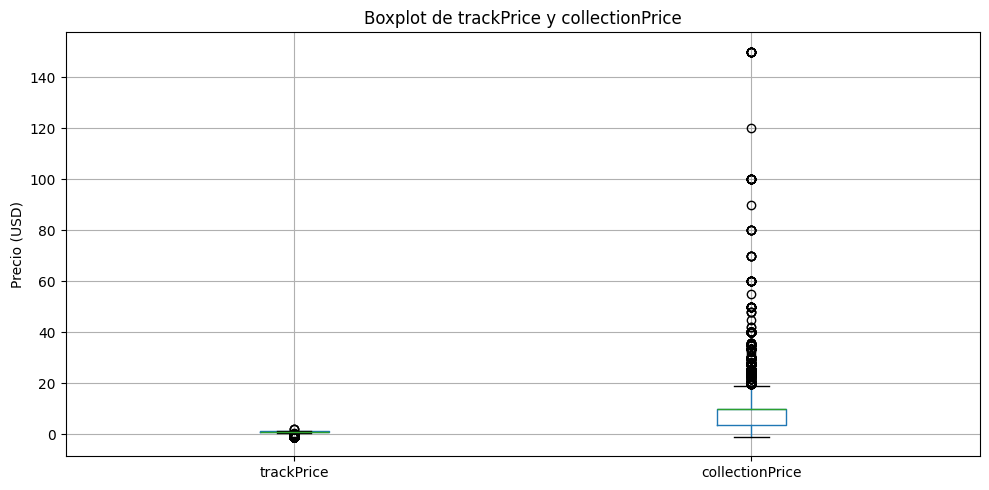

In [16]:
import matplotlib.pyplot as plt

# Estadísticas descriptivas básicas
stats_precios = df[["trackPrice", "collectionPrice"]].describe()
print("Estadísticas descriptivas:\n", stats_precios)

# Boxplot con Matplotlib para trackPrice y collectionPrice
plt.figure(figsize=(10, 5))
df[["trackPrice", "collectionPrice"]].boxplot()
plt.title("Boxplot de trackPrice y collectionPrice")
plt.ylabel("Precio (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
def limpiar_columnas_precio(df):
    """
    Limpia y normaliza las columnas 'trackPrice' y 'collectionPrice':
    - Convierte a numérico
    - Reemplaza -1 y strings nulos por NaN
    - Imputa TODOS los NaN con la media real
    - Redondea a 2 decimales
    - Imprime estadísticas descriptivas finales

    Parámetros:
    -----------
    df : pandas.DataFrame
        El DataFrame original.

    Retorna:
    --------
    pandas.DataFrame
        DataFrame limpio con columnas de precio sin nulos.
    """
    columnas_precio = ["trackPrice", "collectionPrice"]

    for col in columnas_precio:
        df.loc[:, col] = pd.to_numeric(df[col], errors="coerce")
        df.loc[:, col] = df[col].replace([-1, "", " ", "nan", "NaN"], np.nan)
        media = df[col].dropna().mean()
        df.loc[:, col] = df[col].fillna(media).round(2)

    print("\n📊 Estadísticas descriptivas de precios:")
    print(df[columnas_precio].describe())

    return df

# Aplicar función actualizada
df = limpiar_columnas_precio(df)


📊 Estadísticas descriptivas de precios:
          trackPrice  collectionPrice
count  117668.000000    117668.000000
mean        1.121148         7.869275
std         0.161502         5.122632
min         0.290000         0.580000
25%         0.990000         3.960000
50%         0.990000         8.990000
75%         1.290000         9.990000
max         1.990000       149.990000


In [18]:
df[["trackPrice", "collectionPrice"]].isna().sum()

trackPrice         0
collectionPrice    0
dtype: int64

In [19]:
df.isnull().sum()

wrapperType                     0
kind                            0
artistId                        0
collectionId                    0
trackId                         0
artistName                      0
collectionName                  0
trackName                       0
collectionCensoredName          0
trackCensoredName               0
artistViewUrl                   0
collectionViewUrl               0
trackViewUrl                    0
previewUrl                      0
artworkUrl30                    0
artworkUrl60                    0
artworkUrl100                   0
collectionPrice                 0
trackPrice                      0
releaseDate                     0
collectionExplicitness          0
trackExplicitness               0
discCount                       0
discNumber                      0
trackCount                      0
trackNumber                     0
trackTimeMillis                 0
country                         0
currency                        0
primaryGenreNa

In [20]:
def asignar_id_incremental(df, columna, inicio=1):
    """
    Reemplaza completamente una columna con un ID incremental único.

    Esto es útil cuando se requiere generar una clave primaria válida para SQL,
    incluso si la columna original contenía nulos o valores inconsistentes.

    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame original (o una copia del original).

    columna : str
        Nombre de la columna a sobrescribir con IDs únicos.

    inicio : int (default=1)
        Valor inicial del ID incremental.

    Retorna:
    --------
    pandas.DataFrame
        El DataFrame con la columna reemplazada por IDs únicos de tipo Int64.
    """
    df.loc[:, columna] = pd.Series(range(inicio, inicio + len(df)), index=df.index, dtype="Int64")
    return df
df = asignar_id_incremental(df, "collectionArtistId")
df.head(10)

,wrapperType,kind,artistId,collectionId,trackId,artistName,collectionName,trackName,collectionCensoredName,trackCensoredName,artistViewUrl,collectionViewUrl,trackViewUrl,previewUrl,artworkUrl30,artworkUrl60,artworkUrl100,collectionPrice,trackPrice,releaseDate,collectionExplicitness,trackExplicitness,discCount,discNumber,trackCount,trackNumber,trackTimeMillis,country,currency,primaryGenreName,isStreamable,collectionArtistId,collectionArtistName,collectionArtistViewUrl,contentAdvisoryRating,checked_at
0,track,song,14406835,40459605,40459637,The Blues Brothers,Briefcase Full of Blues,Soul Man,Briefcase Full of Blues,Soul Man,httpsmusic.apple.comusartistthe-blues-brothers...,httpsmusic.apple.comusalbumsoul-man40459605?i4...,httpsmusic.apple.comusalbumsoul-man40459605?i4...,httpsaudio-ssl.itunes.apple.comitunes-assetsAu...,httpsis1-ssl.mzstatic.comimagethumbMusic125v49...,httpsis1-ssl.mzstatic.comimagethumbMusic125v49...,httpsis1-ssl.mzstatic.comimagethumbMusic125v49...,9.99,1.29,1978-11-01,notExplicit,notExplicit,1,1,12,9,208498,USA,USD,Blues,True,1,Sin identificar,Sin identificar,Sin identificar,2025-04-20
1,track,song,14406835,452584443,452584459,The Blues Brothers,The Blues Brothers Original Soundtrack Recording,Everybody Needs Somebody to Love,The Blues Brothers Original Soundtrack Recording,Everybody Needs Somebody to Love,httpsmusic.apple.comusartistthe-blues-brothers...,httpsmusic.apple.comusalbumeverybody-needs-som...,httpsmusic.apple.comusalbumeverybody-needs-som...,httpsaudio-ssl.itunes.apple.comitunes-assetsAu...,httpsis1-ssl.mzstatic.comimagethumbMusic115v4c...,httpsis1-ssl.mzstatic.comimagethumbMusic115v4c...,httpsis1-ssl.mzstatic.comimagethumbMusic115v4c...,10.99,1.29,1990-01-01,notExplicit,notExplicit,1,1,11,5,200733,USA,USD,Soundtrack,True,2,Sin identificar,Sin identificar,Sin identificar,2025-04-20
2,track,song,14406835,452584443,452584447,The Blues Brothers,The Blues Brothers Original Soundtrack Recording,Peter Gunn Theme,The Blues Brothers Original Soundtrack Recording,Peter Gunn Theme,httpsmusic.apple.comusartistthe-blues-brothers...,httpsmusic.apple.comusalbumpeter-gunn-theme452...,httpsmusic.apple.comusalbumpeter-gunn-theme452...,httpsaudio-ssl.itunes.apple.comitunes-assetsAu...,httpsis1-ssl.mzstatic.comimagethumbMusic115v4c...,httpsis1-ssl.mzstatic.comimagethumbMusic115v4c...,httpsis1-ssl.mzstatic.comimagethumbMusic115v4c...,10.99,1.29,1980-06-01,notExplicit,notExplicit,1,1,11,2,230333,USA,USD,Soundtrack,True,3,Sin identificar,Sin identificar,Sin identificar,2025-04-20
3,track,song,14406835,452584443,452584465,The Blues Brothers,The Blues Brothers Original Soundtrack Recording,Theme from Rawhide,The Blues Brothers Original Soundtrack Recording,Theme from Rawhide,httpsmusic.apple.comusartistthe-blues-brothers...,httpsmusic.apple.comusalbumtheme-from-rawhide4...,httpsmusic.apple.comusalbumtheme-from-rawhide4...,httpsaudio-ssl.itunes.apple.comitunes-assetsAu...,httpsis1-ssl.mzstatic.comimagethumbMusic115v4c...,httpsis1-ssl.mzstatic.comimagethumbMusic115v4c...,httpsis1-ssl.mzstatic.comimagethumbMusic115v4c...,10.99,1.29,1980-06-01,notExplicit,notExplicit,1,1,11,8,159600,USA,USD,Soundtrack,True,4,Sin identificar,Sin identificar,Sin identificar,2025-04-20
4,track,song,14406835,40459605,40459628,The Blues Brothers,Briefcase Full of Blues,Rubber Biscuit,Briefcase Full of Blues,Rubber Biscuit,httpsmusic.apple.comusartistthe-blues-brothers...,httpsmusic.apple.comusalbumrubber-biscuit40459...,httpsmusic.apple.comusalbumrubber-biscuit40459...,httpsaudio-ssl.itunes.apple.comitunes-assetsAu...,httpsis1-ssl.mzstatic.comimagethumbMusic125v49...,httpsis1-ssl.mzstatic.comimagethumbMusic125v49...,httpsis1-ssl.mzstatic.comimagethumbMusic125v49...,9.99,1.29,1978-11-01,notExplicit,notExplicit,1,1,12,5,177800,USA,USD,Blues,True,5,Sin identificar,Sin identificar,Sin identificar,2025-04-20
5,track,song,14406835,452584443,452584448,The Blues Brothers,The Blues Brothers Original Soundtrack Recording,Gimme Some Lovin',The Blues Brother

In [21]:
df.isnull().sum()

wrapperType                0
kind                       0
artistId                   0
collectionId               0
trackId                    0
artistName                 0
collectionName             0
trackName                  0
collectionCensoredName     0
trackCensoredName          0
artistViewUrl              0
collectionViewUrl          0
trackViewUrl               0
previewUrl                 0
artworkUrl30               0
artworkUrl60               0
artworkUrl100              0
collectionPrice            0
trackPrice                 0
releaseDate                0
collectionExplicitness     0
trackExplicitness          0
discCount                  0
discNumber                 0
trackCount                 0
trackNumber                0
trackTimeMillis            0
country                    0
currency                   0
primaryGenreName           0
isStreamable               0
collectionArtistId         0
collectionArtistName       0
collectionArtistViewUrl    0
contentAdvisor

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df[["artistId", "collectionId", "trackId", "collectionArtistId"]].duplicated().sum()

np.int64(0)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117668 entries, 0 to 118807
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   wrapperType              117668 non-null  object        
 1   kind                     117668 non-null  object        
 2   artistId                 117668 non-null  int64         
 3   collectionId             117668 non-null  Int64         
 4   trackId                  117668 non-null  int64         
 5   artistName               117668 non-null  object        
 6   collectionName           117668 non-null  object        
 7   trackName                117668 non-null  object        
 8   collectionCensoredName   117668 non-null  object        
 9   trackCensoredName        117668 non-null  object        
 10  artistViewUrl            117668 non-null  object        
 11  collectionViewUrl        117668 non-null  object        
 12  trackViewUrl         

In [25]:
# Verificar duplicados totales
duplicados_totales = df.duplicated().sum()

# Buscar errores de texto en columnas tipo object, forzando a string antes del contains
errores_texto = df.select_dtypes(include="object").apply(
    lambda col: col.astype(str).str.contains(r"#¿NOMBRE\?|#¡VALOR!", case=False, na=False)
).sum()

# Mostrar resumen
{
    "duplicados_totales": duplicados_totales,
    "errores_de_texto (#¿NOMBRE? o #¡VALOR!)": errores_texto.sum()
}

{'duplicados_totales': np.int64(0),
 'errores_de_texto (#¿NOMBRE? o #¡VALOR!)': np.int64(0)}

In [26]:
df.to_pickle("../data/data_limpio/itunes.pkl")

In [27]:
def procesar_dataframe_maestro(ruta_pickle):
    """
    Carga un DataFrame maestro desde un archivo pickle, lo limpia y separa en tablas normalizadas:
    Artist, Album, Track, Genre, Track_prices, Album_prices.
    Garantiza que no haya duplicados por ID en tablas principales y limpia registros duplicados
    por ID + fecha en las tablas históricas.

    Parámetros:
    -----------
    ruta_pickle : str
        Ruta del archivo pickle con el DataFrame completo.

    Retorna:
    --------
    dict
        Diccionario con las tablas limpias separadas por nombre.
    """
    # Renombrar columnas para que coincidan con el esquema SQL
    df = pd.read_pickle(ruta_pickle)
    df = df.rename(columns={
        "artistId": "artist_id",
        "artistName": "artistname",
        "artistViewUrl": "artistviewurl",
        "collectionId": "collection_id",
        "collectionName": "collectionname",
        "collectionCensoredName": "collectioncensoredname",
        "releaseDate": "release_date",
        "collectionExplicitness": "collectionexplicitness",
        "contentAdvisoryRating": "contentadvisoryrating",
        "collectionPrice": "collectionprice",
        "currency": "currency",
        "trackCount": "trackcount",
        "discCount": "disccount",
        "collectionViewUrl": "collectionviewurl",
        "collectionArtistId": "collectionartist_id",
        "collectionArtistName": "collectionartistname",
        "collectionArtistViewUrl": "collectionartistviewurl",
        "trackId": "track_id",
        "trackName": "trackname",
        "trackNumber": "tracknumber",
        "trackPrice": "trackprice",
        "discNumber": "discnumber",
        "trackTimeMillis": "tracktimemillis",
        "trackExplicitness": "trackexplicitness",
        "trackViewUrl": "trackviewurl",
        "isStreamable": "is_streamable",
        "kind": "kind",
        "primaryGenreName": "primarygenrename"
    })

    # Tablas principales
    artist_df = (
        df.groupby("artist_id")[["artistname", "artistviewurl"]]
        .agg(lambda x: x.dropna().value_counts().idxmax() if not x.dropna().empty else pd.NA)
        .reset_index()
    )

    album_cols = [
        "collection_id", "collectionname", "collectioncensoredname", "release_date",
        "collectionexplicitness", "contentadvisoryrating", "collectionprice", "currency",
        "trackcount", "disccount", "collectionviewurl", "collectionartist_id",
        "collectionartistname", "collectionartistviewurl", "artist_id"
    ]
    album_df = df[album_cols].drop_duplicates(subset=["collection_id"]).copy()

    track_cols = [
        "track_id", "trackname", "tracknumber", "trackprice", "discnumber", "tracktimemillis",
        "trackexplicitness", "release_date", "trackviewurl", "is_streamable", "kind",
        "artist_id", "collection_id", "primarygenrename"
    ]
    track_df = df[track_cols].drop_duplicates(subset=["track_id"]).copy()

    genre_df = (
        df[["primarygenrename"]]
        .drop_duplicates()
        .reset_index(drop=True)
        .reset_index()
        .rename(columns={"index": "genre_id"})
    )
    track_df = track_df.merge(genre_df, on="primarygenrename", how="left").drop(columns="primarygenrename")

    track_prices_df = (
        df[["track_id", "trackprice", "checked_at"]]
        .dropna(subset=["track_id", "trackprice", "checked_at"])
        .drop_duplicates(subset=["track_id", "checked_at"])
    )

    album_prices_df = (
        df[["collection_id", "collectionprice", "checked_at"]]
        .dropna(subset=["collection_id", "collectionprice", "checked_at"])
        .drop_duplicates(subset=["collection_id", "checked_at"])
    )

    return {
        "artist": artist_df,
        "album": album_df,
        "track": track_df,
        "genre": genre_df,
        "track_prices": track_prices_df,
        "album_prices": album_prices_df
    }

# Ejecutar función actualizada y guardar como pickle
tablas_normalizadas = procesar_dataframe_maestro("../data/data_limpio/itunes.pkl")

# Guardar los archivos actualizados
for nombre, tabla in tablas_normalizadas.items():
    tabla.to_pickle(f"../data/data_limpio/{nombre.lower()}.pkl")

# Confirmar archivos exportados
[f"../data/data_limpio/{nombre.lower()}.pkl" for nombre in tablas_normalizadas.keys()]

['../data/data_limpio/artist.pkl',
 '../data/data_limpio/album.pkl',
 '../data/data_limpio/track.pkl',
 '../data/data_limpio/genre.pkl',
 '../data/data_limpio/track_prices.pkl',
 '../data/data_limpio/album_prices.pkl']

In [28]:
# Comprobaciones finales de duplicados
duplicados_artist = tablas_normalizadas["artist"]["artist_id"].duplicated().sum()
duplicados_album = tablas_normalizadas["album"]["collection_id"].duplicated().sum()
duplicados_track = tablas_normalizadas["track"]["track_id"].duplicated().sum()

# Comprobar si en las tablas históricas se repiten combinaciones de ID + fecha
duplicados_track_prices = tablas_normalizadas["track_prices"].duplicated(subset=["track_id", "checked_at"]).sum()
duplicados_album_prices = tablas_normalizadas["album_prices"].duplicated(subset=["collection_id", "checked_at"]).sum()

# Ejemplos concretos de filas repetidas (si existieran)
track_prices_duplicados = tablas_normalizadas["track_prices"][
    tablas_normalizadas["track_prices"].duplicated(subset=["track_id", "checked_at"], keep=False)
].sort_values(["track_id", "checked_at"]).head()

album_prices_duplicados = tablas_normalizadas["album_prices"][
    tablas_normalizadas["album_prices"].duplicated(subset=["collection_id", "checked_at"], keep=False)
].sort_values(["collection_id", "checked_at"]).head()

{
    "Artist con duplicados de ID": duplicados_artist,
    "Album con duplicados de ID": duplicados_album,
    "Track con duplicados de ID": duplicados_track,
    "Track_prices con duplicados ID + fecha": duplicados_track_prices,
    "Album_prices con duplicados ID + fecha": duplicados_album_prices,
    "Ejemplo duplicados en Track_prices": track_prices_duplicados,
    "Ejemplo duplicados en Album_prices": album_prices_duplicados
}


{'Artist con duplicados de ID': np.int64(0),
 'Album con duplicados de ID': np.int64(0),
 'Track con duplicados de ID': np.int64(0),
 'Track_prices con duplicados ID + fecha': np.int64(0),
 'Album_prices con duplicados ID + fecha': np.int64(0),
 'Ejemplo duplicados en Track_prices': Empty DataFrame
 Columns: [track_id, trackprice, checked_at]
 Index: [],
 'Ejemplo duplicados en Album_prices': Empty DataFrame
 Columns: [collection_id, collectionprice, checked_at]
 Index: []}

In [29]:
# Cargar el archivo pickle
df = pd.read_pickle("../data/data_limpio/itunes.pkl")

# Ver cuántas filas son duplicadas exactamente (todas las columnas)
duplicados = df.duplicated().sum()

# Ver total de filas
total = len(df)

print(f"Duplicados exactos: {duplicados} de {total} filas")

Duplicados exactos: 0 de 117668 filas


In [30]:
df_genre = pd.read_pickle("../data/data_limpio/genre.pkl")
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   genre_id          290 non-null    int64 
 1   primarygenrename  290 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.7+ KB


In [31]:
df_artist = pd.read_pickle("../data/data_limpio/artist.pkl")
df_artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22460 entries, 0 to 22459
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   artist_id      22460 non-null  int64 
 1   artistname     22460 non-null  object
 2   artistviewurl  22460 non-null  object
dtypes: int64(1), object(2)
memory usage: 526.5+ KB


In [32]:
df_album = pd.read_pickle("../data/data_limpio/album.pkl")
df_album.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51056 entries, 0 to 118807
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   collection_id            51056 non-null  Int64         
 1   collectionname           51056 non-null  object        
 2   collectioncensoredname   51056 non-null  object        
 3   release_date             51056 non-null  datetime64[ns]
 4   collectionexplicitness   51056 non-null  object        
 5   contentadvisoryrating    51056 non-null  object        
 6   collectionprice          51056 non-null  float64       
 7   currency                 51056 non-null  object        
 8   trackcount               51056 non-null  Int64         
 9   disccount                51056 non-null  Int64         
 10  collectionviewurl        51056 non-null  object        
 11  collectionartist_id      51056 non-null  Int64         
 12  collectionartistname     51056 non-n

In [33]:
df_track = pd.read_pickle("../data/data_limpio/track.pkl")
df_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110567 entries, 0 to 110566
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   track_id           110567 non-null  int64         
 1   trackname          110567 non-null  object        
 2   tracknumber        110567 non-null  Int64         
 3   trackprice         110567 non-null  float64       
 4   discnumber         110567 non-null  Int64         
 5   tracktimemillis    110567 non-null  Int64         
 6   trackexplicitness  110567 non-null  object        
 7   release_date       110567 non-null  datetime64[ns]
 8   trackviewurl       110567 non-null  object        
 9   is_streamable      110567 non-null  boolean       
 10  kind               110567 non-null  object        
 11  artist_id          110567 non-null  int64         
 12  collection_id      110567 non-null  Int64         
 13  genre_id           110567 non-null  int64   